In [2]:
# Будем отображать графики прямо в jupyter'e
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [4]:
forest_fires = pd.read_csv("../data/forest_fires_preprocessed.csv")

In [5]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  517 non-null    int64  
 1   X           517 non-null    int64  
 2   Y           517 non-null    int64  
 3   month       517 non-null    int64  
 4   day         517 non-null    int64  
 5   FFMC        517 non-null    float64
 6   DMC         517 non-null    float64
 7   DC          517 non-null    float64
 8   ISI         517 non-null    float64
 9   temp        517 non-null    float64
 10  RH          517 non-null    int64  
 11  wind        517 non-null    float64
 12  rain        517 non-null    float64
 13  area        517 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 56.7 KB


In [9]:
forest_fires.pop('Unnamed: 0')
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Посмотрим на корреляционную матрицу признаков

In [81]:
forest_fires.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.056496
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,0.023226
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519


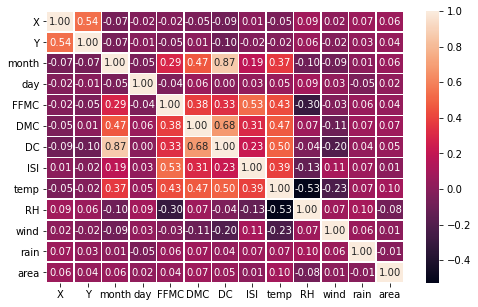

In [87]:
sns.heatmap(forest_fires.corr(), 
            annot=True, fmt=".2f", linewidths=0.5);

Построим график попарных зависимостей некоторых признаков.

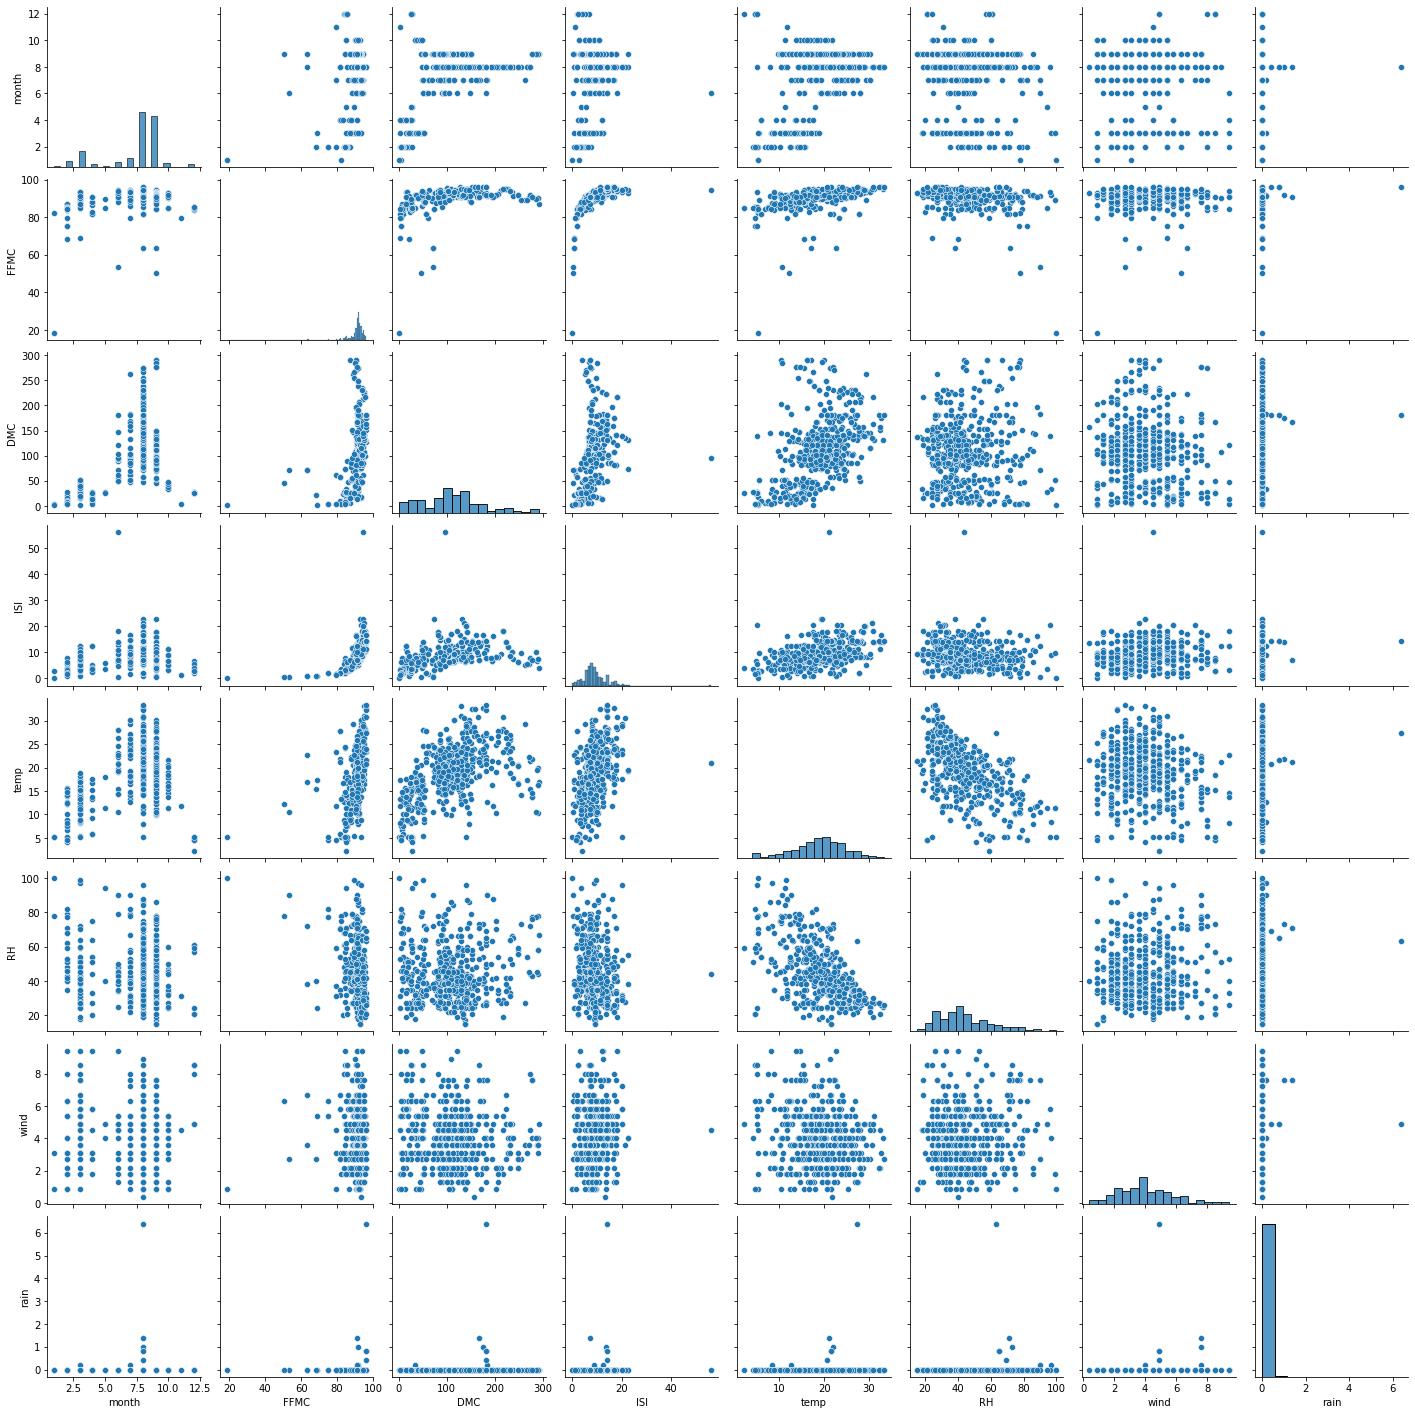

In [23]:
cols = ['month', 'FFMC', 'DMC', 'ISI', 'temp', 'RH', 'wind', 'rain']
sns_plot = sns.pairplot(forest_fires[cols])

Выводы по попарным зависимостям:
- От температуры зависят коды FWI system
- Коды FWI system зависят между собой

Отдельно построим попарные зависимости целевого признака от остальных признаков (в обычном масштабе)

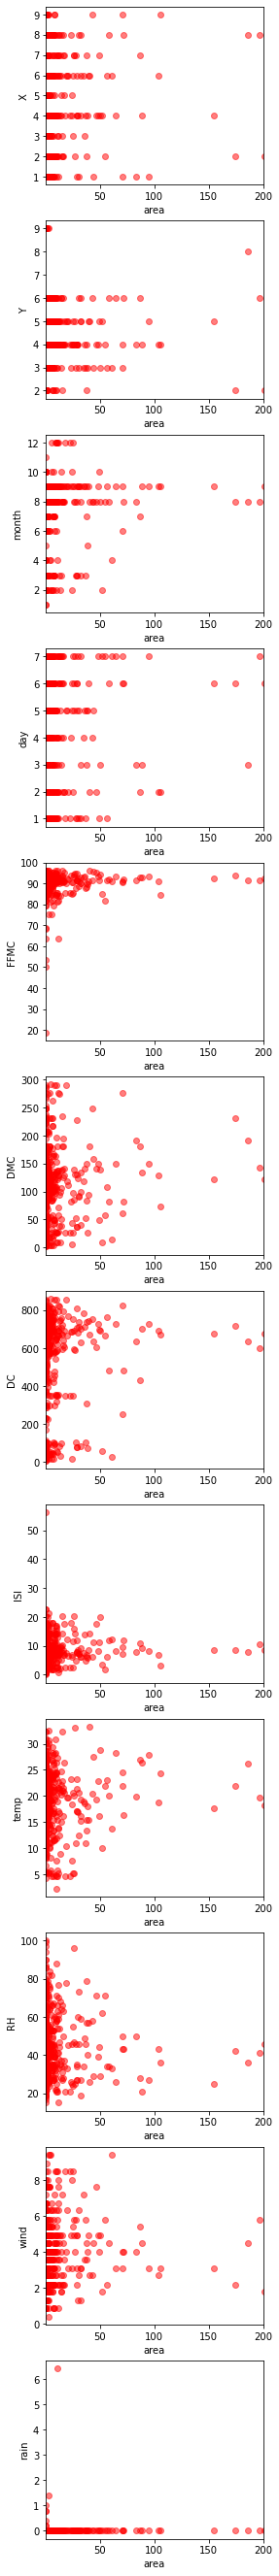

In [77]:
n_cols = len(forest_fires.columns)-1
fig = plt.figure(figsize=(4, 4*n_cols))
x = forest_fires['area']
for i in range(n_cols):
    y = forest_fires.iloc[:, i]
    ax = fig.add_subplot(n_cols, 1, i+1)
    ax.set_xlabel('area')
    ax.set_ylabel(forest_fires.columns[i])
    ax.set(xlim=(0.1, 200))
    ax.scatter(x, y, alpha=0.5, c='r')

Так как целевой признак скошен к 0, отдельно построим графики в логарифмическом масштабе

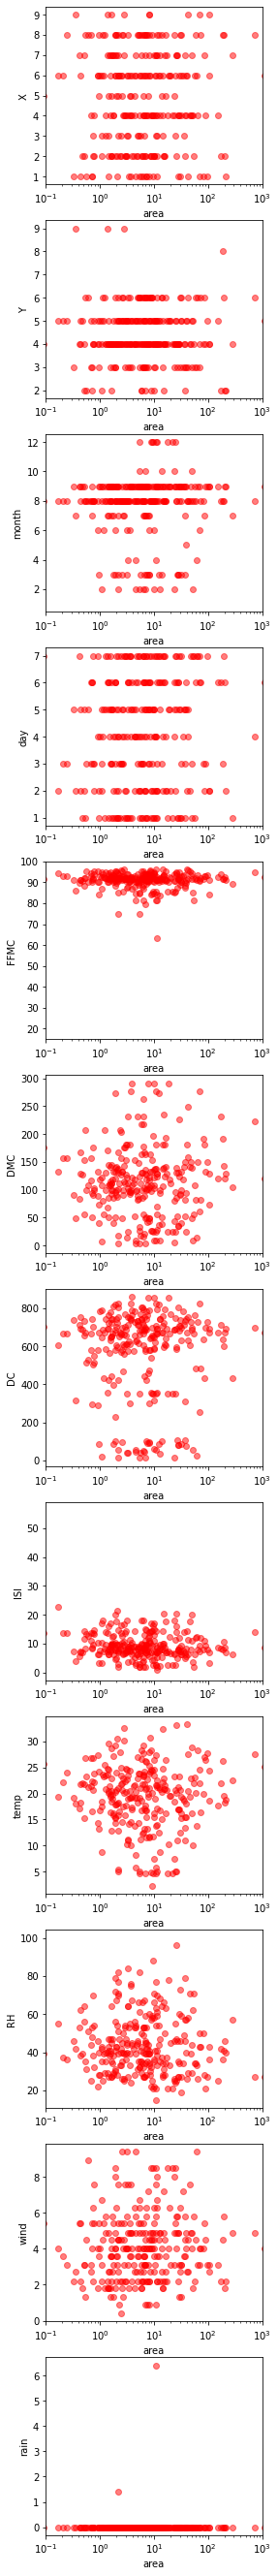

In [76]:
n_cols = len(forest_fires.columns)-1
fig = plt.figure(figsize=(4, 4*n_cols))
x = forest_fires['area']
for i in range(n_cols):
    y = forest_fires.iloc[:, i]
    ax = fig.add_subplot(n_cols, 1, i+1)
    ax.set_xlabel('area')
    ax.set_ylabel(forest_fires.columns[i])
    ax.set_xscale('log')
    ax.set(xlim=(0.1, 1000))
    ax.scatter(x, y, alpha=0.5, c='r')

Выводы по графикам зависимости целевого признака от остальных:
- В основном пожары происходили в августе и сентябре — можно предположить, что эти месяцы самые жаркие (признак «month»)
- Чем больше была температура, тем больше шанс на пожар — более высокая температура повышает шансы на возгарание (признак «temp»)
- Чем меньше относительная влажность воздуха, тем больше шансов на пожар — более сухой воздух повышает шансы на возгорание (признак «RH»)
- Чем сильней был ветер, тем больше сгорело леса — скорость ветра влияет на скорость распространения огня (признак «wind»)
- Чем больше FFMC (обозначает влажность поверхностной подстилки топлива), тем больше сгорело леса —  FFMC влияет на воспламенение и распространение огня (признак «FFMC»)

Построим грифики плостности распределения признаков

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

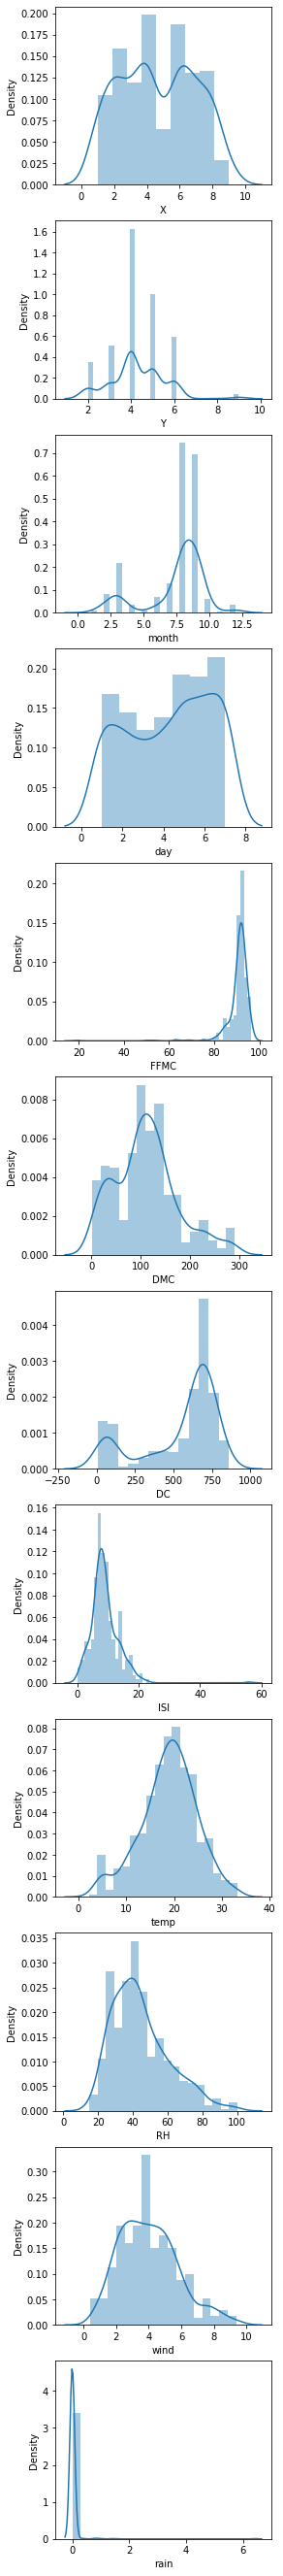

In [95]:
n_cols = len(forest_fires.columns)-1
fig = plt.figure(figsize=(4, 4*n_cols))
for i in range(n_cols):
    y = forest_fires.iloc[:, i]
    ax = fig.add_subplot(n_cols, 1, i+1)
    ax.set_xlabel(forest_fires.columns[i])
    sns.distplot(y)

<AxesSubplot:>

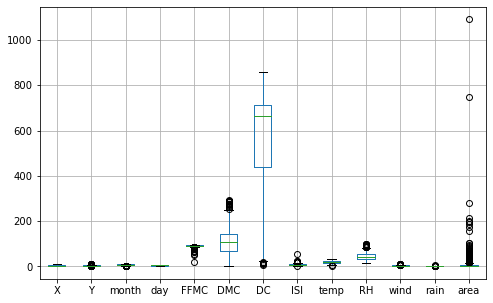

In [96]:
forest_fires.boxplot()